In [1]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth

from sklearn.metrics import confusion_matrix

# umap
# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

import functions

pd.set_option('display.max_columns', None)

In [2]:
customer_data = pd.read_csv( 'C:/Users/aprataso/Downloads/final_data/treated/customer_info_EDA.csv')
customer_data.head(2)

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,dep_quantity,gender,homeowner_code,total_quantity,total_sales_value,unique_dep
0,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",-0.403613,-0.046647,-0.015142,"[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","['Groceries', 'Groceries', 'Groceries', 'DELI'...",2021-02-20,0,Homeowner,married,senior,2.0,0,65.0,42000.0,0.0,2.0,3285.02,226.99,373.56,102.01,568.23,44.09,21.40,4.47,8.55,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'RX': 0, 'AUTOMOTIVE': 0, 'SALAD BAR': 13, 'G...",2.0,0,1997,4634.32,"['FLORAL', 'Groceries', 'RESTAURANT', 'Meat', ..."
1,2,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, ...",-0.469174,-0.012605,0.000000,"[0.7, 4.78, 1.07, 0.85, 2.68, 2.68, 2.68, 5.35...","['Groceries', 'Groceries', 'Groceries', 'Groce...",2021-04-13,1,Probable Owner,single,young-adult,1.0,0,21.5,25000.0,0.0,1.0,1361.50,50.01,238.86,26.55,353.11,0.00,4.56,0.00,23.53,9.62,23.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'RX': 0, 'AUTOMOTIVE': 0, 'SALAD BAR': 0, 'GA...",0.0,1,834,2091.36,"['FLORAL', 'Groceries', 'Meat', 'Seafood', 'CO..."


In [ ]:
## TO DO LIST
# test clustering without a column for each department

In [12]:
#customer_data = customer_data.drop(['MISC SALES TRAN_spend', 'KIOSK-GAS_spend'], axis = 1)

In [6]:
# creating a new variable with only numeric data
info_numeric = customer_data.loc[:, ~customer_data.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group', 'quantity', 'sales_value_eu',
     'department','dep_quantity', 'first_transaction_date', 'unique_dep', 'homeowner_code'])]

In [7]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   household_key          2500 non-null   int64  
 1   retail_disc            2500 non-null   float64
 2   coupon_disc            2500 non-null   float64
 3   coupon_match_disc      2500 non-null   float64
 4   marital_status_code    2500 non-null   int64  
 5   adult_category_size    2500 non-null   float64
 6   has_kids               2500 non-null   int64  
 7   avg_age                2500 non-null   float64
 8   avg_income             2500 non-null   float64
 9   n_kids                 2500 non-null   float64
 10  n_household            2500 non-null   float64
 11  Groceries_spend        2500 non-null   float64
 12  DELI_spend             2500 non-null   float64
 13  Meat_spend             2500 non-null   float64
 14  Bakery_spend           2500 non-null   float64
 15  DRUG

In [8]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## K-Means

In [9]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

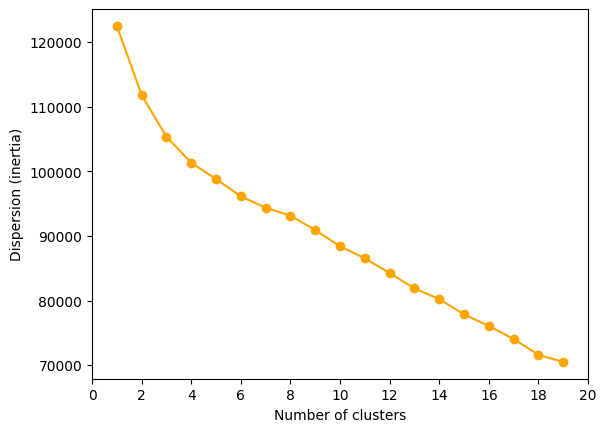

In [10]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_info)

info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_11248\353943095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)


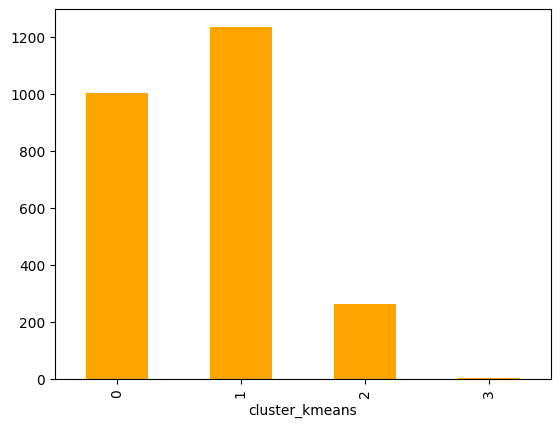

In [14]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [15]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).mean().T


## NO SCALLING
# 0 - spend little 
# 1 - people w/ kids, buy a lot with retail_disc, buy more items, homewoners
# 2 - 
# 3 - high income, like groceries and bakery stuff
# 4 - rent videos, seafood lovers

## SCALLING
# 0 - single
# 1 - 2 adults + 2 kids
# 2 - 2 adults with 0-1 kids
# 3 - adults w/o kids
# 4 - discount lovers

cluster_kmeans,0,1,2,3
household_key,1254.909,1225.538,1351.802,1023.000
retail_disc,-0.581,-0.550,-0.525,-0.485
coupon_disc,-0.015,-0.012,-0.020,-0.018
coupon_match_disc,-0.002,-0.002,-0.003,-0.002
marital_status_code,0.521,1.380,0.928,2.000
adult_category_size,1.930,1.017,1.624,2.000
has_kids,0.618,0.113,0.331,0.000
avg_age,42.624,37.015,43.108,65.000
avg_income,101751.748,56996.761,86496.198,187000.000
n_kids,0.819,0.113,0.563,0.000


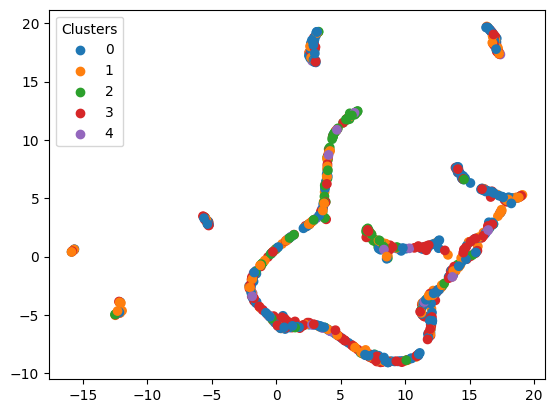

In [35]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_kmeans'].sort_index())

## Hierarchical

In [36]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

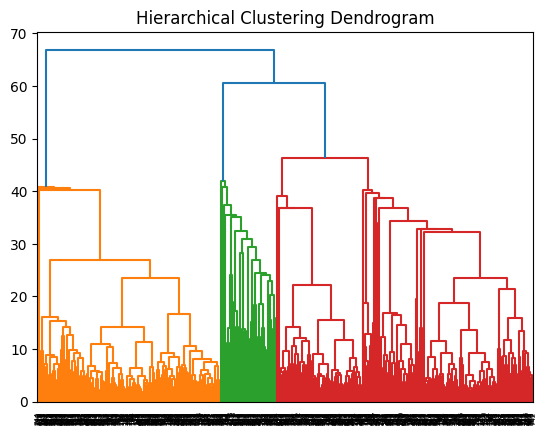

In [38]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
functions.plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

In [39]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\2294577397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


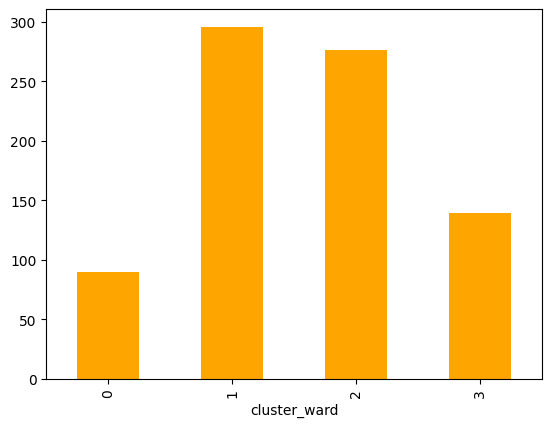

In [40]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [41]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2,3
marital_status_code,0.767,1.635,0.953,0.496
household_key,1405.000,1211.297,1217.667,1210.835
adult_category_size,1.733,1.010,1.888,2.000
has_kids,0.356,0.000,0.072,0.978
avg_age,44.517,43.939,45.913,40.309
avg_income,103516.667,51778.716,65936.594,65262.590
n_kids,0.656,0.000,0.123,1.820
n_household,2.556,1.422,2.094,3.820
gender(s),1.667,0.608,1.862,2.000
retail_disc,-0.560,-0.508,-0.572,-0.566


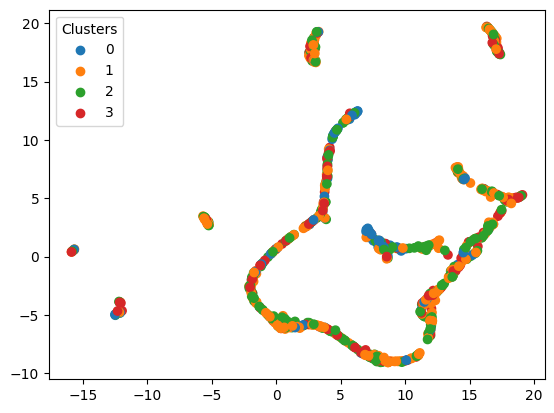

In [42]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_ward'].sort_index())

## DB Scan

In [45]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\2362419876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)


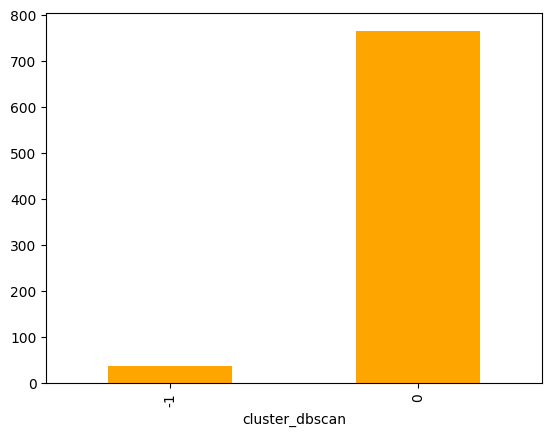

In [46]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [47]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
marital_status_code,1.056,1.107
household_key,1455.639,1224.801
adult_category_size,1.639,1.562
has_kids,0.333,0.230
avg_age,41.056,44.195
avg_income,75388.889,64312.418
n_kids,0.639,0.422
n_household,2.278,2.193
gender(s),1.528,1.395
retail_disc,-0.553,-0.545


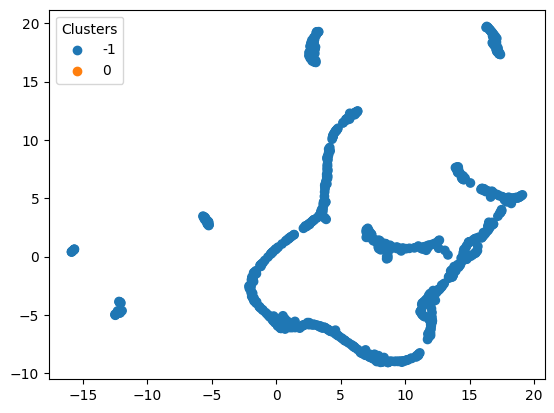

In [48]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_dbscan'].sort_index())

## UMAP

In [26]:
from umap import UMAP
umap_object = UMAP(n_neighbors=50, min_dist=0.3, n_components=4, random_state=42)

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\aprataso\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\__init__.py)


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
X_sample = info_numeric.sort_index()

In [140]:
umap_embedding = umap_object.fit_transform(X_sample)

C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


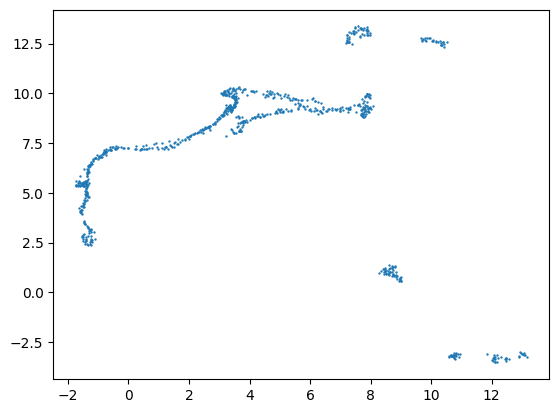

In [141]:
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1],s=0.5)

## UMAP to DB SCAN

In [49]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X_sample)


C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [142]:
'''clusterable_embedding = umap.UMAP(n_neighbors=50, min_dist=0.3,
                                   n_components=4, 
                                   random_state=42).fit_transform(X_sample)'''


C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


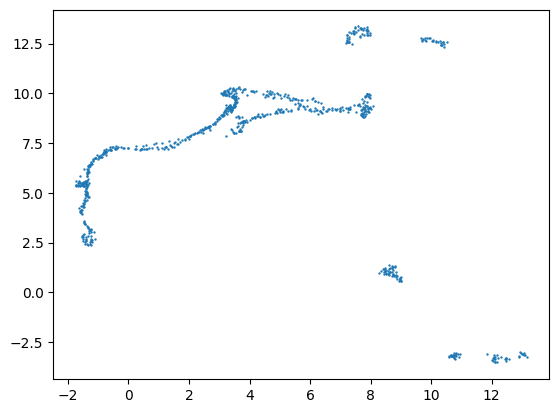

In [143]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [144]:
labels = DBSCAN(eps=1, min_samples=20).fit_predict(clusterable_embedding)

In [145]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


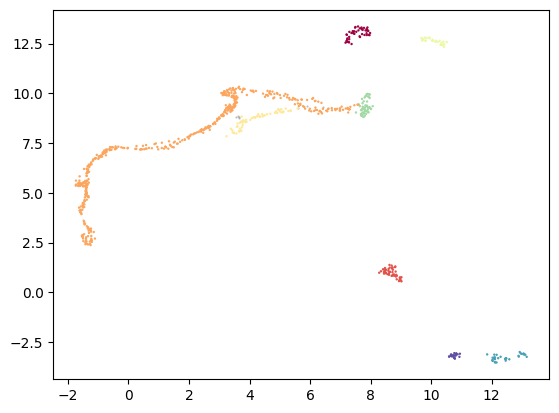

In [146]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

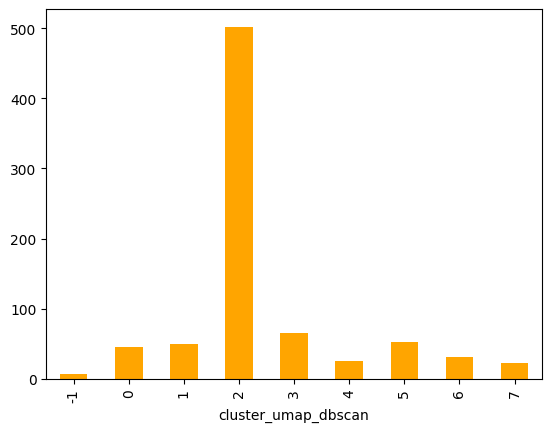

In [147]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [55]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

cluster_umap_dbscan,0,1,2,3,4,5,6,7,8,9,10,11,12
marital_status_code,1.109,1.306,1.174,0.810,1.090,0.932,1.000,1.068,1.481,1.108,1.236,0.742,0.909
household_key,1031.413,1185.061,1227.844,1224.310,1339.836,1346.636,1409.270,1319.324,1215.852,1187.783,1092.909,1305.806,1209.409
adult_category_size,1.587,1.469,1.545,1.810,1.612,1.614,1.514,1.541,1.296,1.614,1.455,1.710,1.636
has_kids,0.217,0.184,0.214,0.405,0.194,0.250,0.270,0.216,0.037,0.241,0.255,0.419,0.273
avg_age,43.804,44.245,43.761,42.357,43.604,42.977,44.959,43.311,44.370,45.145,45.127,46.581,44.136
avg_income,42000.000,62000.000,58234.375,75845.238,84970.149,89761.364,78027.027,62831.081,29500.000,60765.060,18290.909,154000.000,87000.000
n_kids,0.435,0.327,0.384,0.833,0.358,0.477,0.459,0.405,0.037,0.446,0.418,0.806,0.500
n_household,2.304,1.857,2.107,2.643,2.104,2.318,2.378,2.162,1.852,2.277,2.145,2.581,2.364
gender(s),1.413,1.265,1.379,1.738,1.463,1.455,1.324,1.270,1.111,1.542,1.291,1.581,1.364
retail_disc,-0.526,-0.494,-0.590,-0.589,-0.547,-0.532,-0.531,-0.543,-0.530,-0.542,-0.497,-0.463,-0.488


Export

In [23]:
info_numeric.to_csv(
    'C:/Users/aprataso/Downloads/final_data/treated/cluster_data_num.csv',
    index=False)